In [11]:
!pip install -r requirements.txt


# below fixes some bugs introduced by some recent Colab changes
!mkdir -p /usr/share/vulkan/icd.d
!wget -q https://raw.githubusercontent.com/haosulab/ManiSkill2/main/docker/nvidia_icd.json
!wget -q https://raw.githubusercontent.com/haosulab/ManiSkill2/main/docker/10_nvidia.json
!mv nvidia_icd.json /usr/share/vulkan/icd.d
!mv 10_nvidia.json /usr/share/glvnd/egl_vendor.d/10_nvidia.json
# dependencies
#!pip install setuptools==65.5.0
!apt-get install -y --no-install-recommends libvulkan-dev
!pip install mani_skill2
!pip install --upgrade --no-cache-dir gdown

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libvulkan-dev is already the newest version (1.3.204.1-2).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
import mani_skill2.envs
from tqdm.notebook import tqdm
import time



# Pybullet

In [13]:
# from environments.pbullet import Pbullet


# env = Pbullet()
# env.connect()
# env.load_object()

# obs = env.reset()
# target_position = [0, 0.8, 1]
# target_orientation = [0, np.pi, 0]
# action={}
# action['position'] = target_position
# action['orientation'] = target_orientation
# action['gripper'] = [0.1, 1]
# obs = env.step(action)

# time.sleep(2)
# env.get_robot_info()

# Maniskill

Action Space: Box(-1.0, 1.0, (8,), float32)


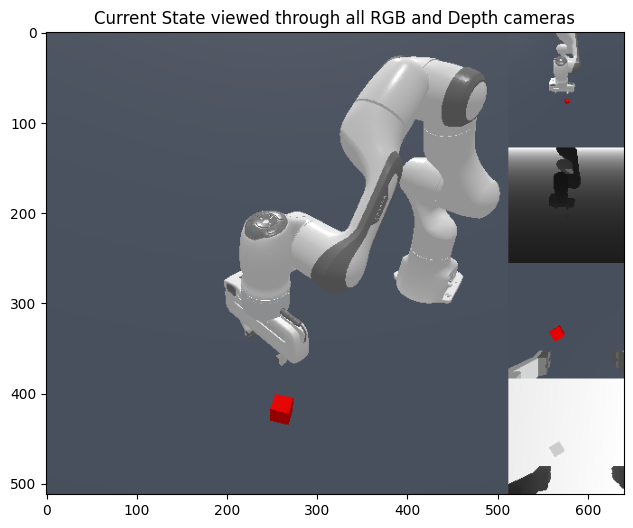

In [14]:
env_id = "PickCube-v0"
obs_mode = "rgbd"
control_mode = "pd_joint_delta_pos"
reward_mode = "dense"

env = gym.make(env_id,
               obs_mode=obs_mode,
               reward_mode=reward_mode,
               control_mode=control_mode,
               enable_shadow=False)
obs, _ = env.reset()
print("Action Space:", env.action_space)

# take a look at the current state
img = env.unwrapped.render_cameras()
plt.figure(figsize=(10,6))
plt.title("Current State viewed through all RGB and Depth cameras")
plt.imshow(img)

In [15]:
from mani_skill2.utils.wrappers import RecordEpisode
env = RecordEpisode(
    env,
    "./videos", # the directory to save replay videos and trajectories to
    info_on_video=True # when True, will add informative text onto the replay video such as step counter, reward, and other metrics
)

# step through the environment with random actions
obs, _ = env.reset()
for i in tqdm(range(100)):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)

env.flush_video() # Save the video
env.close()
from IPython.display import Video
Video("./videos/0.mp4", embed=True) # Watch our replay

2024-02-15 08:12:59,208 - mani_skill2 - WARNING - mani_skill2 is not installed with git.
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_state to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_state` for environment variables or `env.get_wrapper_attr('get_state')` that will search the reminding wrappers.
  logger.warn(


  0%|          | 0/100 [00:00<?, ?it/s]